Make depth profiles of ocean velocities in all 10 runs, plus composites. 

In [25]:
import numpy as np
from matplotlib import pyplot as plt
import Functions_load_output as flo
import Functions_data_analysis as fda
import Functions_plotting as fp
from Datasets import exp_set_dict_warm_order
import xarray as xr

In [2]:
import importlib
importlib.reload(fp)

<module 'Functions_plotting' from '/glade/campaign/univ/ulnl0002/Gemma/Analysis/Functions_plotting.py'>

In [37]:
exp_set = 'ic_2001'#e.g., ic_1995, control
region = 'ET_2'


# for 1st yr mean
# month_start_idx = 0
# n_months = 11 # for averaging 1st yr (feb - dec)

# for 2nd yr mean
# month_start_idx = 11
# n_months = 12 # for averaging 2nd yr (jan -dec)

# for 3rd yr mean
# month_start_idx = 23
# n_months = 12 

# for 4th yr mean
month_start_idx = 35
n_months = 12 

# for 5th yr mean
# month_start_idx = 47
# n_months = 12 # for averaging one year 

# for ctrl run
# month_start_idx = 0
# n_months = 312 #for full control run

ic_str = exp_set.split('_')[-1]

Error with plotting highlight_locs!


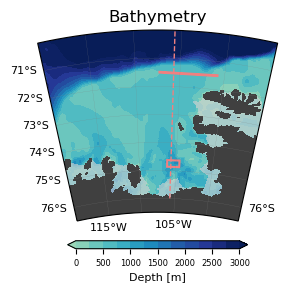

In [4]:
bathy_map = fp.plot_bathymetry_and_locs('bathy_map', [region,'shelf_box','EOT','PITT'])
plt.savefig('Plots/Figure_bathymetry_map_with_locs.png',dpi=400)

In [38]:
# Ocean T, U, and V
prefix = 'state_3d_set2' # To plot ocean T, U, or V at a given depth
runs = exp_set_dict_warm_order[exp_set]
print(runs)
all_run_t_da = fda.get_ensemble_data_for_ic('T', runs, region, prefix, month_start_idx = month_start_idx, n_months=n_months) 
all_run_u_da = fda.get_ensemble_data_for_ic('U', runs, region, prefix, month_start_idx = month_start_idx, n_months=n_months)
all_run_v_da = fda.get_ensemble_data_for_ic('V', runs, region, prefix, month_start_idx = month_start_idx, n_months=n_months)
# these have shape (10, 12, 70, 256 lats)
print('Data retrieved!')

['run_forc_erai_1982_rep_ic_2001', 'run_forc_erai_1984_rep_ic_2001', 'run_forc_erai_1989_rep_ic_2001', 'run_forc_erai_1992_rep_ic_2001', 'run_forc_erai_1994_rep_ic_2001', 'run_forc_erai_2003_rep_ic_2001', 'run_forc_erai_2009_rep_ic_2001', 'run_forc_erai_1991_rep_ic_2001', 'run_forc_erai_2015_rep_ic_2001', 'run_forc_erai_2011_rep_ic_2001']
Getting T data for all runs...
0
saving date from these times for 1st run:
 [cftime.DatetimeNoLeap(2004, 1, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2004, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2004, 3, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2004, 4, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2004, 5, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2004, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2004, 7, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2004, 8, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(2004, 9, 1, 0, 0, 0, 0, 

In [39]:
# average over times and make list for plotting
u_ens_time_mean = all_run_u_da.mean(dim='time')
u_em = u_ens_time_mean.mean(dim='run')
v_ens_time_mean = all_run_v_da.mean(dim='time')
v_em = v_ens_time_mean.mean(dim='run')
t_ens_time_mean = all_run_t_da.mean(dim='time')
t_em = t_ens_time_mean.mean(dim='run')

# put actual data and anomalies in list, with composite warm and cool after 4th and 9th 
ny, nx = u_em.shape[0],u_em.shape[1]
n_runs = len(runs)
u_arr = np.zeros((n_runs+2,ny,nx))
v_arr = np.zeros((n_runs+2,ny,nx))
t_arr = np.zeros((n_runs+2,ny,nx))
u_anom_arr = np.zeros((n_runs+2,ny,nx))
v_anom_arr = np.zeros((n_runs+2,ny,nx))
t_anom_arr = np.zeros((n_runs+2,ny,nx))
sp_labs = np.empty(12,dtype='<U4')

# Uncomment for warm and cool plotted on far right column
# run_idxs = [0,1,2,3,5,6,7,8,10,11] #this is hard coded to skip 4th and 9th element for composite means.
# warm_idx, cool_idx = 4,9
# cool_start_idx = 5

# Uncomment for warm and cool plotted on bottom row
run_idxs = [0,1,2,3,4,5,6,7,8,9] #this is hard coded to skip 4th and 9th element for composite means.
warm_idx,cool_idx = 10, 11
cool_start_idx = 4

#add runs to correct indices, leaving holes for composites
for i in range(n_runs):
    run_idx = run_idxs[i]
    u_arr[run_idx] = all_run_u_da[i].mean(dim='time')
    v_arr[run_idx] = all_run_v_da[i].mean(dim='time')
    t_arr[run_idx] = all_run_t_da[i].mean(dim='time')
    u_anom_arr[run_idx] = all_run_u_da[i].mean(dim='time') - u_em
    v_anom_arr[run_idx] = all_run_v_da[i].mean(dim='time') - v_em
    t_anom_arr[run_idx] = all_run_t_da[i].mean(dim='time') - t_em
    run = str(all_run_u_da[i].run.values)
    year = run.split('run_forc_erai_')[1][0:4]
    sp_labs[run_idx] = year
    
# add mean of warm runs 
u_arr[warm_idx] = np.mean(u_arr[0:4],axis=0)
v_arr[warm_idx] = np.mean(v_arr[0:4],axis=0)
t_arr[warm_idx] = np.mean(t_arr[0:4],axis=0)
u_anom_arr[warm_idx] = np.mean(u_anom_arr[0:4],axis=0)
v_anom_arr[warm_idx] = np.mean(v_anom_arr[0:4],axis=0)
t_anom_arr[warm_idx] = np.mean(t_anom_arr[0:4],axis=0)
sp_labs[warm_idx] = 'Warm Composite'

# and mean of cool runs
u_arr[cool_idx] = np.mean(u_arr[cool_start_idx:cool_start_idx+4],axis=0)
v_arr[cool_idx] = np.mean(v_arr[cool_start_idx:cool_start_idx+4],axis=0)
t_arr[cool_idx] = np.mean(t_arr[cool_start_idx:cool_start_idx+4],axis=0)
u_anom_arr[cool_idx] = np.mean(u_anom_arr[cool_start_idx:cool_start_idx+4],axis=0)
v_anom_arr[cool_idx] = np.mean(v_anom_arr[cool_start_idx:cool_start_idx+4],axis=0)
t_anom_arr[cool_idx] = np.mean(t_anom_arr[cool_start_idx:cool_start_idx+4],axis=0)
sp_labs[cool_idx]='Cool Composite'

try:
    u_da = xr.DataArray(u_arr, coords = {'run':sp_labs,'depth':u_em.depth, 'lat':u_em.lat},dims=('run','depth','lat'))
    v_da = xr.DataArray(v_arr, coords = {'run':sp_labs,'depth':u_em.depth, 'lat':u_em.lat},dims=('run','depth','lat'))
    t_da = xr.DataArray(t_arr, coords = {'run':sp_labs,'depth':u_em.depth, 'lat':u_em.lat},dims=('run','depth','lat'))
    u_anom_da = xr.DataArray(u_anom_arr, coords = {'run':sp_labs,'depth':u_em.depth, 'lat':u_em.lat},dims=('run','depth','lat'))
    v_anom_da = xr.DataArray(v_anom_arr, coords = {'run':sp_labs,'depth':u_em.depth, 'lat':u_em.lat},dims=('run','depth','lat'))
    t_anom_da = xr.DataArray(t_anom_arr, coords = {'run':sp_labs,'depth':u_em.depth, 'lat':u_em.lat},dims=('run','depth','lat'))
    x_ax = 'lat'
except:
    u_da = xr.DataArray(u_arr, coords = {'run':sp_labs,'depth':u_em.depth, 'lon':u_em.lon},dims=('run','depth','lon'))
    v_da = xr.DataArray(v_arr, coords = {'run':sp_labs,'depth':u_em.depth, 'lon':u_em.lon},dims=('run','depth','lon'))
    t_da = xr.DataArray(t_arr, coords = {'run':sp_labs,'depth':u_em.depth, 'lon':u_em.lon},dims=('run','depth','lon'))
    u_anom_da = xr.DataArray(u_anom_arr, coords = {'run':sp_labs,'depth':u_em.depth, 'lon':u_em.lon},dims=('run','depth','lon'))
    v_anom_da = xr.DataArray(v_anom_arr, coords = {'run':sp_labs,'depth':u_em.depth, 'lon':u_em.lon},dims=('run','depth','lon'))
    t_anom_da = xr.DataArray(t_anom_arr, coords = {'run':sp_labs,'depth':u_em.depth, 'lon':u_em.lon},dims=('run','depth','lon'))
    x_ax = 'lon'

In [29]:
cmap_dict = {'U':'BrBG_r','V':'PiYG_r','T':'RdBu_r','S':'GnBu'}


lev_dict = {'U':np.linspace(-0.1,0.1,11),'V':np.linspace(-0.1,0.1,11),\
           'T':np.linspace(-0.5,0.5,2),'S':np.linspace(34,34.8,17)}

anom_lev_dict = {'U':np.linspace(-0.05,0.05,11),'V':np.linspace(-0.05,0.05,11),\
                 'T':np.linspace(-0.02,0.02,3),'S':np.linspace(34,34.8,17)}

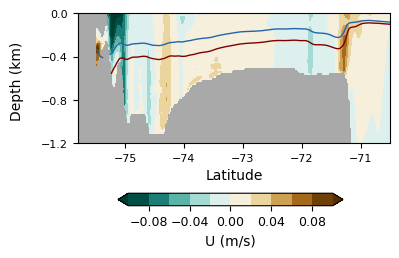

In [8]:
# Plot ensemble mean
importlib.reload(fp)

# fig_name='Plots/Figure_U_5thyr_mean_depth_'+x_ax+'_profile_ens_mean_'+exp_set+'.png'
fig_name=None

n_rows,n_cols,width,height,bot_pos,cb_x_pos,cb_y_pos,cb_height= 1,1,4,2.5,0.45,0.3,.2,.05
plot_format = [n_rows,n_cols,width,height,bot_pos,cb_x_pos,cb_y_pos,cb_height]

fp.make_side_profile_figs([u_em], 'U',plot_format,T_data = [t_em],\
                          levs=lev_dict['U'], T_levs = lev_dict['T'],\
                          subplot_labels = [''],cmap=cmap_dict['U'], \
                          ylims=[-1.2,0],xlims=[-75.8,-70.5],\
                          fig_name = fig_name)

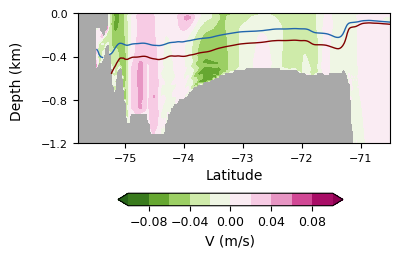

In [9]:
# Plot ensemble mean
# fig_name='Plots/Figure_V_5thyr_mean_depth_'+x_ax+'_profile_ens_mean_'+exp_set+'.png'
fig_name = None

n_rows,n_cols,width,height,bot_pos,cb_x_pos,cb_y_pos,cb_height= 1,1,4,2.5,0.45,0.3,.2,.05
plot_format = [n_rows,n_cols,width,height,bot_pos,cb_x_pos,cb_y_pos,cb_height]

fp.make_side_profile_figs([v_em], 'V',plot_format,
                          T_data = [t_em],levs=lev_dict['V'], T_levs = lev_dict['T'],\
                          subplot_labels = [''],cmap=cmap_dict['V'], \
                          ylims=[-1.2,0],xlims=[-75.8,-70.5],\
                          fig_name = fig_name)

saving as Plots/Figure_U_4thyr_mean_depth_lat_profile_ens_ic_2001.png


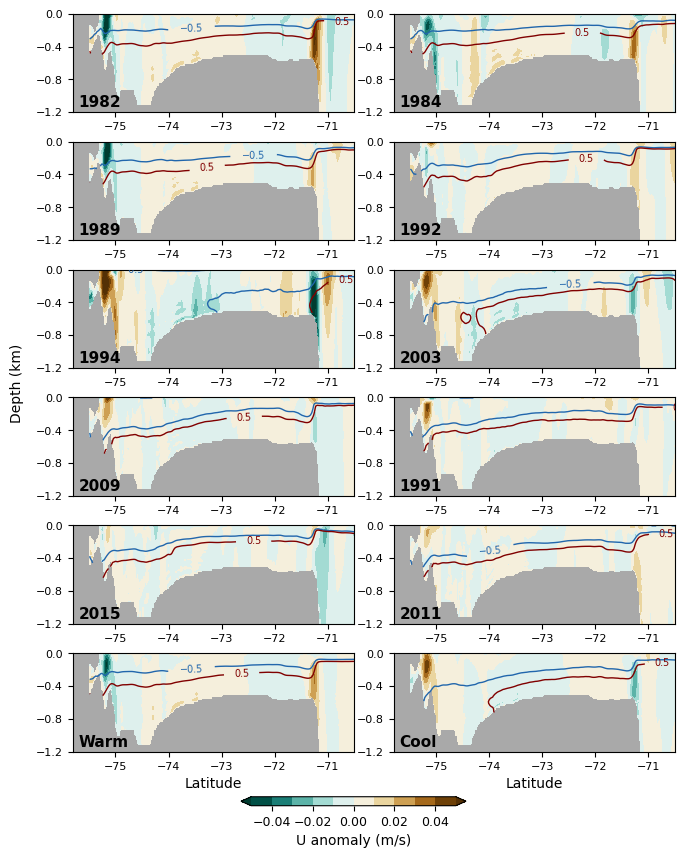

In [40]:
importlib.reload(fp)

# Plot U with T contours

# Edit fig name for saving!!
fig_name = 'Plots/Figure_U_4thyr_mean_depth_'+x_ax+'_profile_ens_'+exp_set+'.png'
# fig_name = None

n_rows,n_cols,width,height,bot_pos,cb_x_pos,cb_y_pos,cb_height = 6,2,7,9,.12,.36,.06,0.01
plot_format = [n_rows,n_cols,width,height,bot_pos,cb_x_pos,cb_y_pos,cb_height]
fp.make_side_profile_figs(u_anom_da, 'U anomaly',plot_format,T_data = t_da,\
                          levs=anom_lev_dict['U'], T_levs = lev_dict['T'],\
                          subplot_labels = sp_labs,cmap=cmap_dict['U'], \
                          ylims=[-1.2,0],xlims=[-75.8,-70.5],\
                          fig_name = fig_name)

saving as Plots/Figure_V_4thyr_mean_depth_lat_profile_ens_ic_2001.png


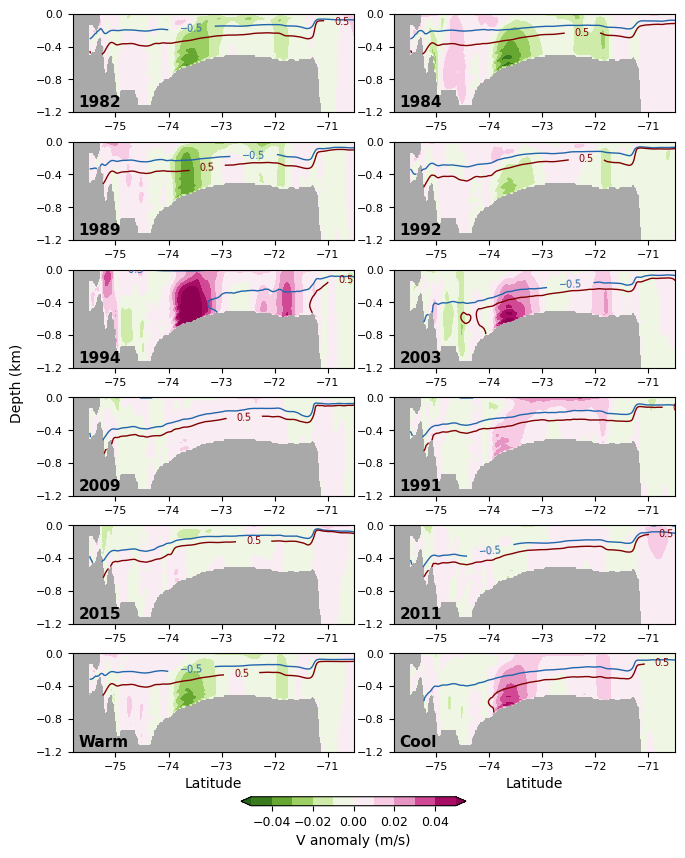

In [41]:
# Plot V with T contours

# Edit fig name for saving!!!
fig_name = 'Plots/Figure_V_4thyr_mean_depth_'+x_ax+'_profile_ens_'+exp_set+'.png'
# fig_name = None

n_rows,n_cols,width,height,bot_pos,cb_x_pos,cb_y_pos,cb_height = 6,2,7,9,.12,.36,.06,0.01
plot_format = [n_rows,n_cols,width,height,bot_pos,cb_x_pos,cb_y_pos,cb_height]
fp.make_side_profile_figs(v_anom_da, 'V anomaly',plot_format,T_data = t_da,\
                          levs=anom_lev_dict['V'], T_levs = lev_dict['T'],\
                          subplot_labels = sp_labs,cmap=cmap_dict['V'], \
                          ylims=[-1.2,0],xlims=[-75.8,-70.5],\
                          fig_name = fig_name)